# 1.Loading the Data and Packages

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [ ]:
 train_set_x_orig = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/Dataset/train_set_x_orig (1).npy')
 train_set_y = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/Dataset/train_set_y (1).npy')
 test_set_x_orig = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/Dataset/test_set_x_orig (1).npy')
 test_set_y = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/Dataset/test_set_y (1).npy')
 dev_set_x_orig = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/Dataset/dev_set_x_orig (1).npy')
 dev_set_y = np.load('/content/gdrive/My Drive/Memes_Vs_Notes/Dataset/dev_set_y (1).npy')

Y = [1]
It's a Note.


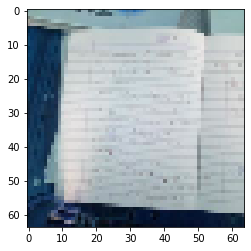

In [ ]:
# Example of a picture
index = 1519
plt.imshow(train_set_x_orig[index])
Y = train_set_y[:,index]
print("Y = " + str(train_set_y[:,index]))
if Y == 0:
  print("It's a Meme.")
else:
  print("It's a Note.") 

In [ ]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
m_dev = dev_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Number of testing examples: m_dev = " + str(m_dev))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("dev_set_x shape: " + str(dev_set_x_orig.shape))
print ("dev_set_y shape: " + str(dev_set_y.shape))

Number of training examples: m_train = 1520
Number of testing examples: m_test = 48
Number of testing examples: m_dev = 32
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (1520, 64, 64, 3)
train_set_y shape: (1, 1520)
test_set_x shape: (48, 64, 64, 3)
test_set_y shape: (1, 48)
dev_set_x shape: (32, 64, 64, 3)
dev_set_y shape: (1, 32)


In [ ]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
dev_set_x_flatten = dev_set_x_orig.reshape(dev_set_x_orig.shape[0], -1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("dev_set_x_flatten shape: " + str(dev_set_x_flatten.shape))
print ("dev_set_y shape: " + str(dev_set_y.shape))

print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 1520)
train_set_y shape: (1, 1520)
test_set_x_flatten shape: (12288, 48)
test_set_y shape: (1, 48)
dev_set_x_flatten shape: (12288, 32)
dev_set_y shape: (1, 32)
sanity check after reshaping: [252 255 252 252 255]


In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
dev_set_x = dev_set_x_flatten/255.
print ("sanity check after standardizing: " + str(train_set_x[0:5,0]))

sanity check after standardizing: [0.98823529 1.         0.98823529 0.98823529 1.        ]


# Helper Functions

In [ ]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

In [ ]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

In [ ]:
def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache

In [ ]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [ ]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [ ]:
def linear_forward(A, W, b):
    Z = W @ A + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z, cache

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
 
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)   
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1)
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W{:d}'.format(l)], parameters['b{:d}'.format(l)], activation='relu')
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W%d' % L], parameters['b%d' % L], activation='sigmoid')
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [ ]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -1 / m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))
    cost = np.squeeze(cost)   
    assert(cost.shape == ())
    return cost

In [ ]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1 / m * dZ @ A_prev.T
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = W.T @ dZ

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
def linear_activation_backward(dA, cache, activation):
   
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
      
    return dA_prev, dW, db

In [ ]:
def L_model_backward(AL, Y, caches):
   
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # Y is the same shape as AL
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, 'sigmoid')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters)   # number of layers in neural network
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

In [ ]:
def predict(X, y, parameters):
 m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("Accuracy: "  + str(np.sum((p == y)/m)))
    return p

# Two Layered Model

In [ ]:
# CONSTANTS DEFINING THE MODEL 
n_x = 12288     # num_px * num_px * 3 ==> 64*64*3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y) #2 layer model

In [ ]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                          # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        
        cost = compute_cost(A2, Y)

      # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation.
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6943044432923556
Cost after iteration 100: 0.6264650060357683
Cost after iteration 200: 0.4721126276784583
Cost after iteration 300: 0.39294163925036624
Cost after iteration 400: 0.32600744259577946
Cost after iteration 500: 0.28647255946298755
Cost after iteration 600: 0.26046143006531713
Cost after iteration 700: 0.2412405653830008
Cost after iteration 800: 0.22568761378016672
Cost after iteration 900: 0.22281189560592204
Cost after iteration 1000: 0.21019859889235118
Cost after iteration 1100: 0.20626281600194776
Cost after iteration 1200: 0.1954850360459419
Cost after iteration 1300: 0.1859158352476589
Cost after iteration 1400: 0.17326335629736223
Cost after iteration 1500: 0.1636373911310815
Cost after iteration 1600: 0.1514135679262522
Cost after iteration 1700: 0.1440783621999807
Cost after iteration 1800: 0.13654057100072783
Cost after iteration 1900: 0.1311962065829175
Cost after iteration 2000: 0.12141451978416079
Cost after iteration 2100: 0.116905

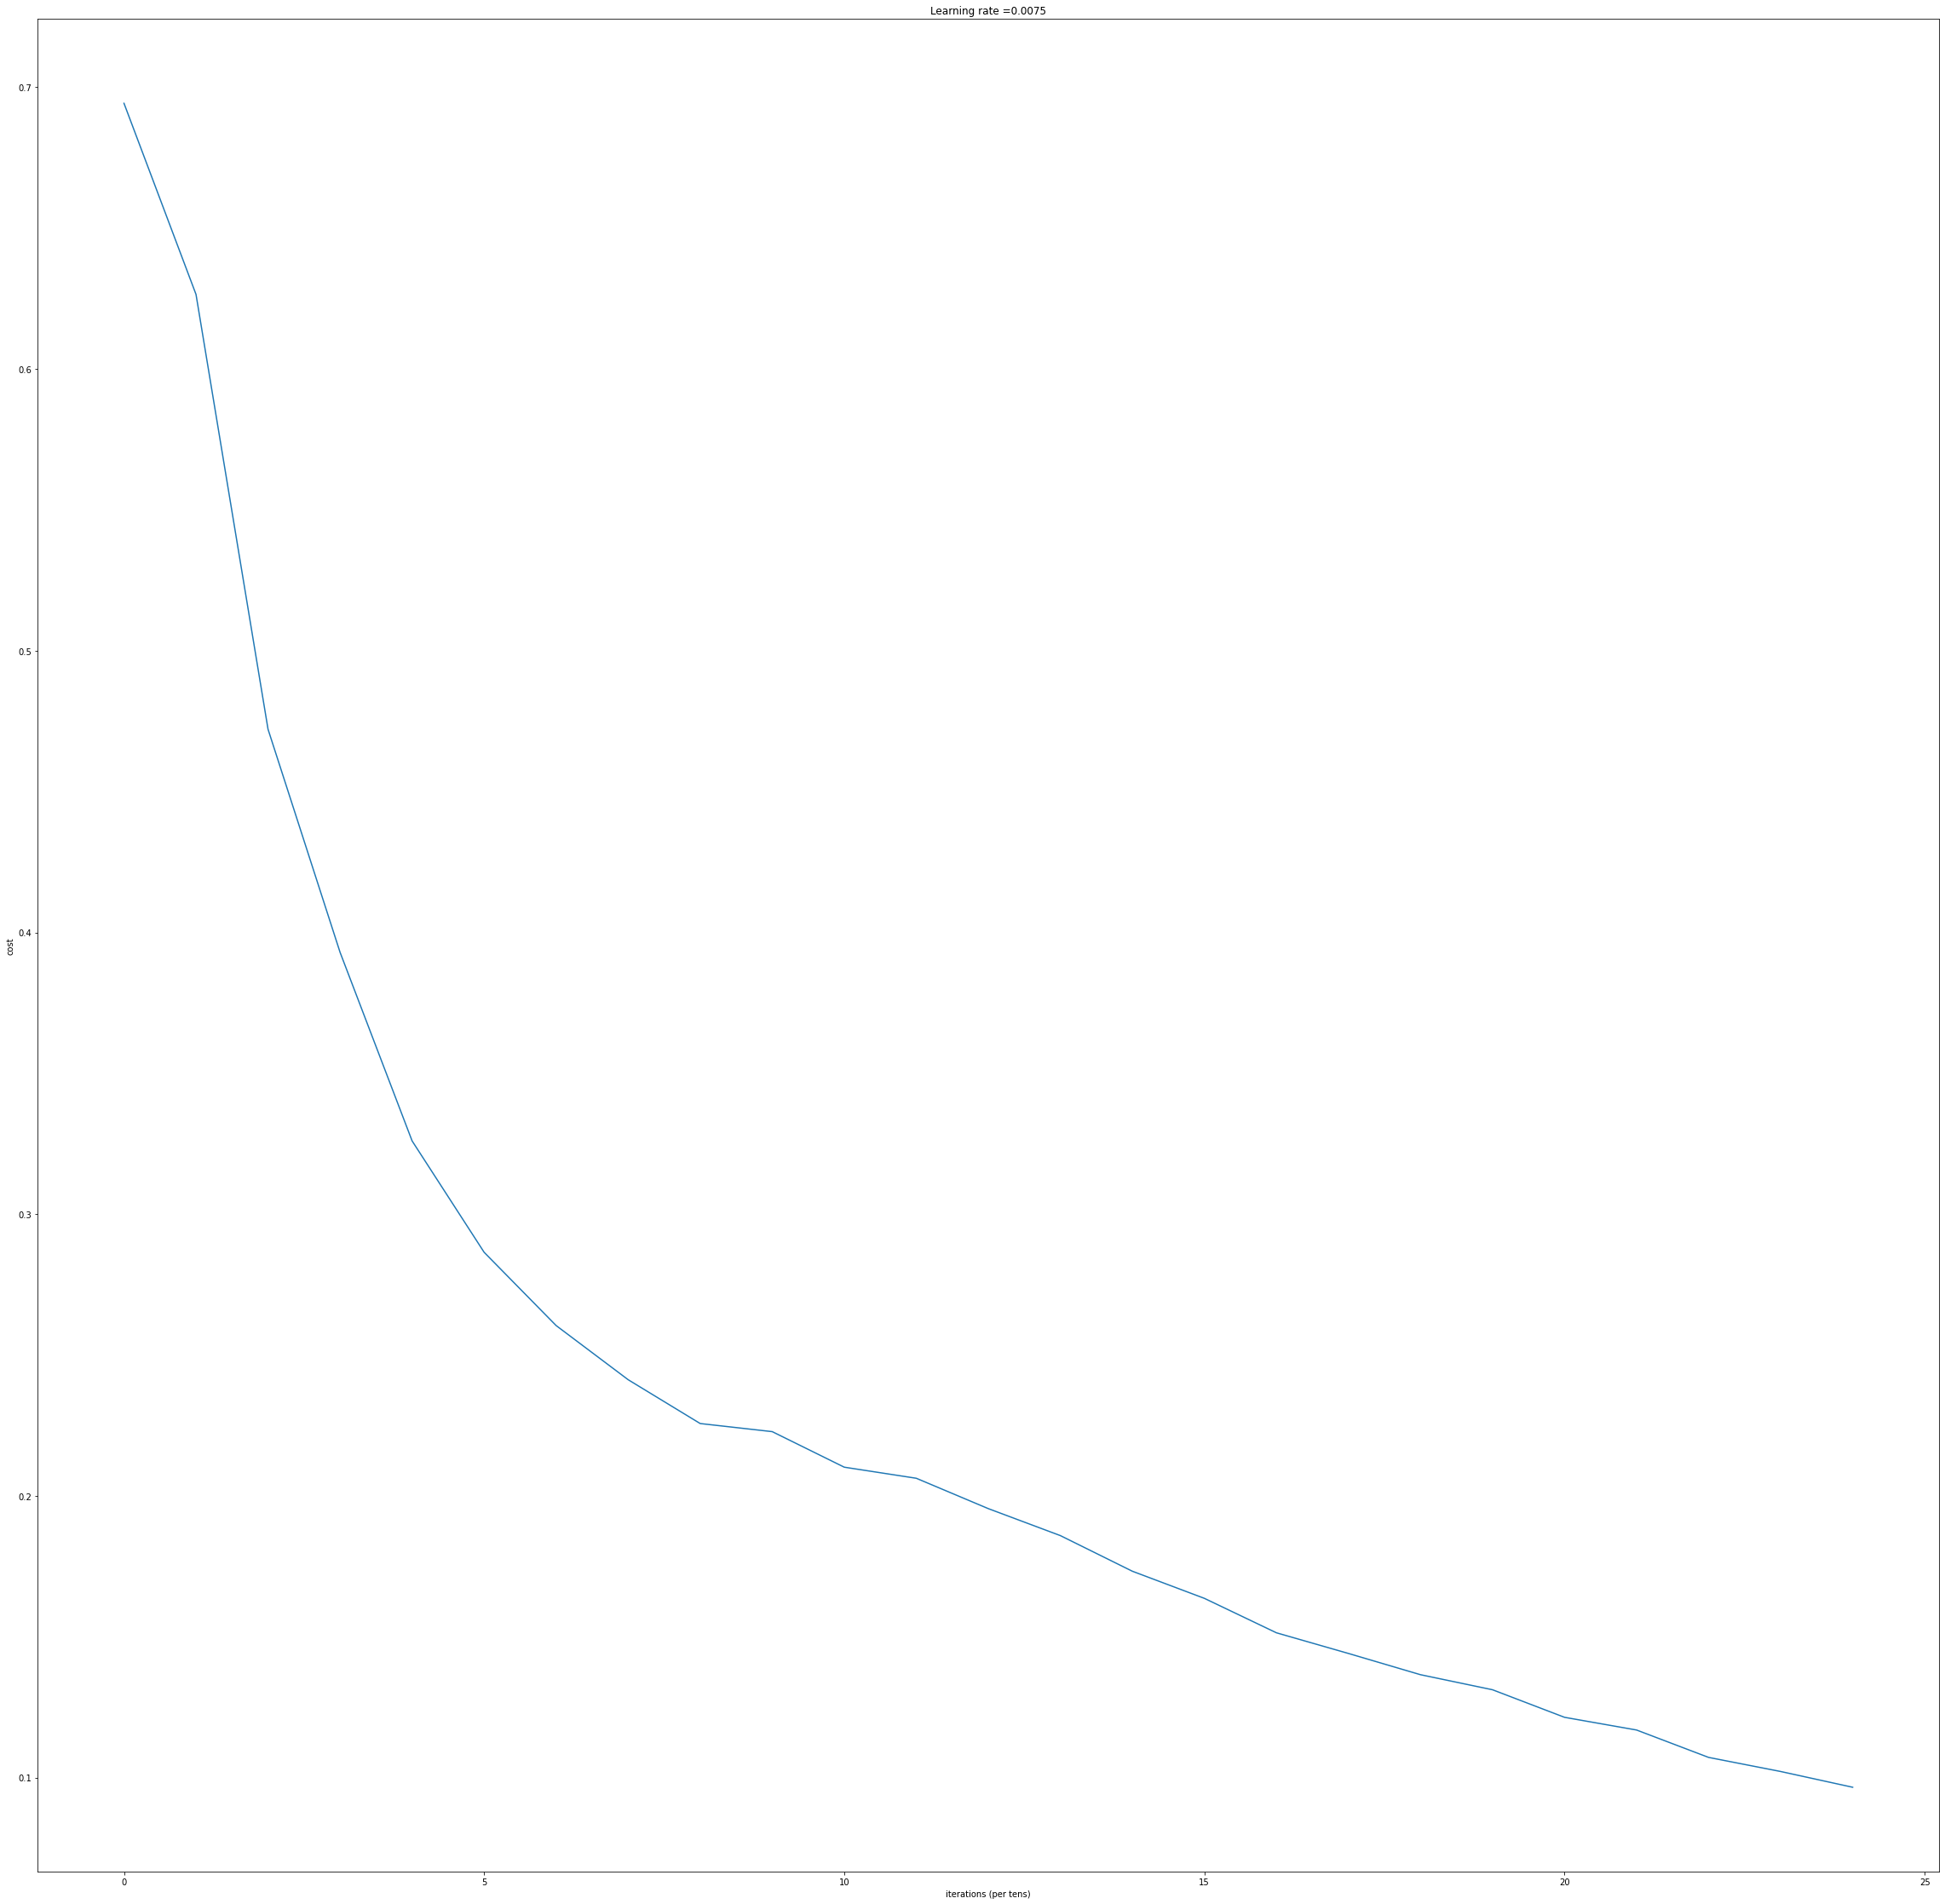

In [ ]:
parameters = two_layer_model(train_set_x, train_set_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [ ]:
predictions_train = predict(train_set_x, train_set_y, parameters)

Accuracy: 0.9763157894736845


In [ ]:
predictions_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 0.8749999999999999


# L-Layer Model

In [ ]:
### CONSTANTS ###
layers_dims = [12288, 10, 5, 1] #  4-layer model

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    

    np.random.seed(1)
    costs = []                    
    
    # Parameters initialization. 
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: 
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads =  L_model_backward(AL, Y, caches)
 
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693114
Cost after iteration 100: 0.693099
Cost after iteration 200: 0.693078
Cost after iteration 300: 0.693049
Cost after iteration 400: 0.693005
Cost after iteration 500: 0.692936
Cost after iteration 600: 0.692824
Cost after iteration 700: 0.692627
Cost after iteration 800: 0.692247
Cost after iteration 900: 0.691420
Cost after iteration 1000: 0.689344
Cost after iteration 1100: 0.683504
Cost after iteration 1200: 0.668467
Cost after iteration 1300: 0.630037
Cost after iteration 1400: 0.577873
Cost after iteration 1500: 0.539291
Cost after iteration 1600: 0.503469
Cost after iteration 1700: 0.466097
Cost after iteration 1800: 0.423391
Cost after iteration 1900: 0.368584
Cost after iteration 2000: 0.307411
Cost after iteration 2100: 0.261941
Cost after iteration 2200: 0.231529
Cost after iteration 2300: 0.209003
Cost after iteration 2400: 0.190012


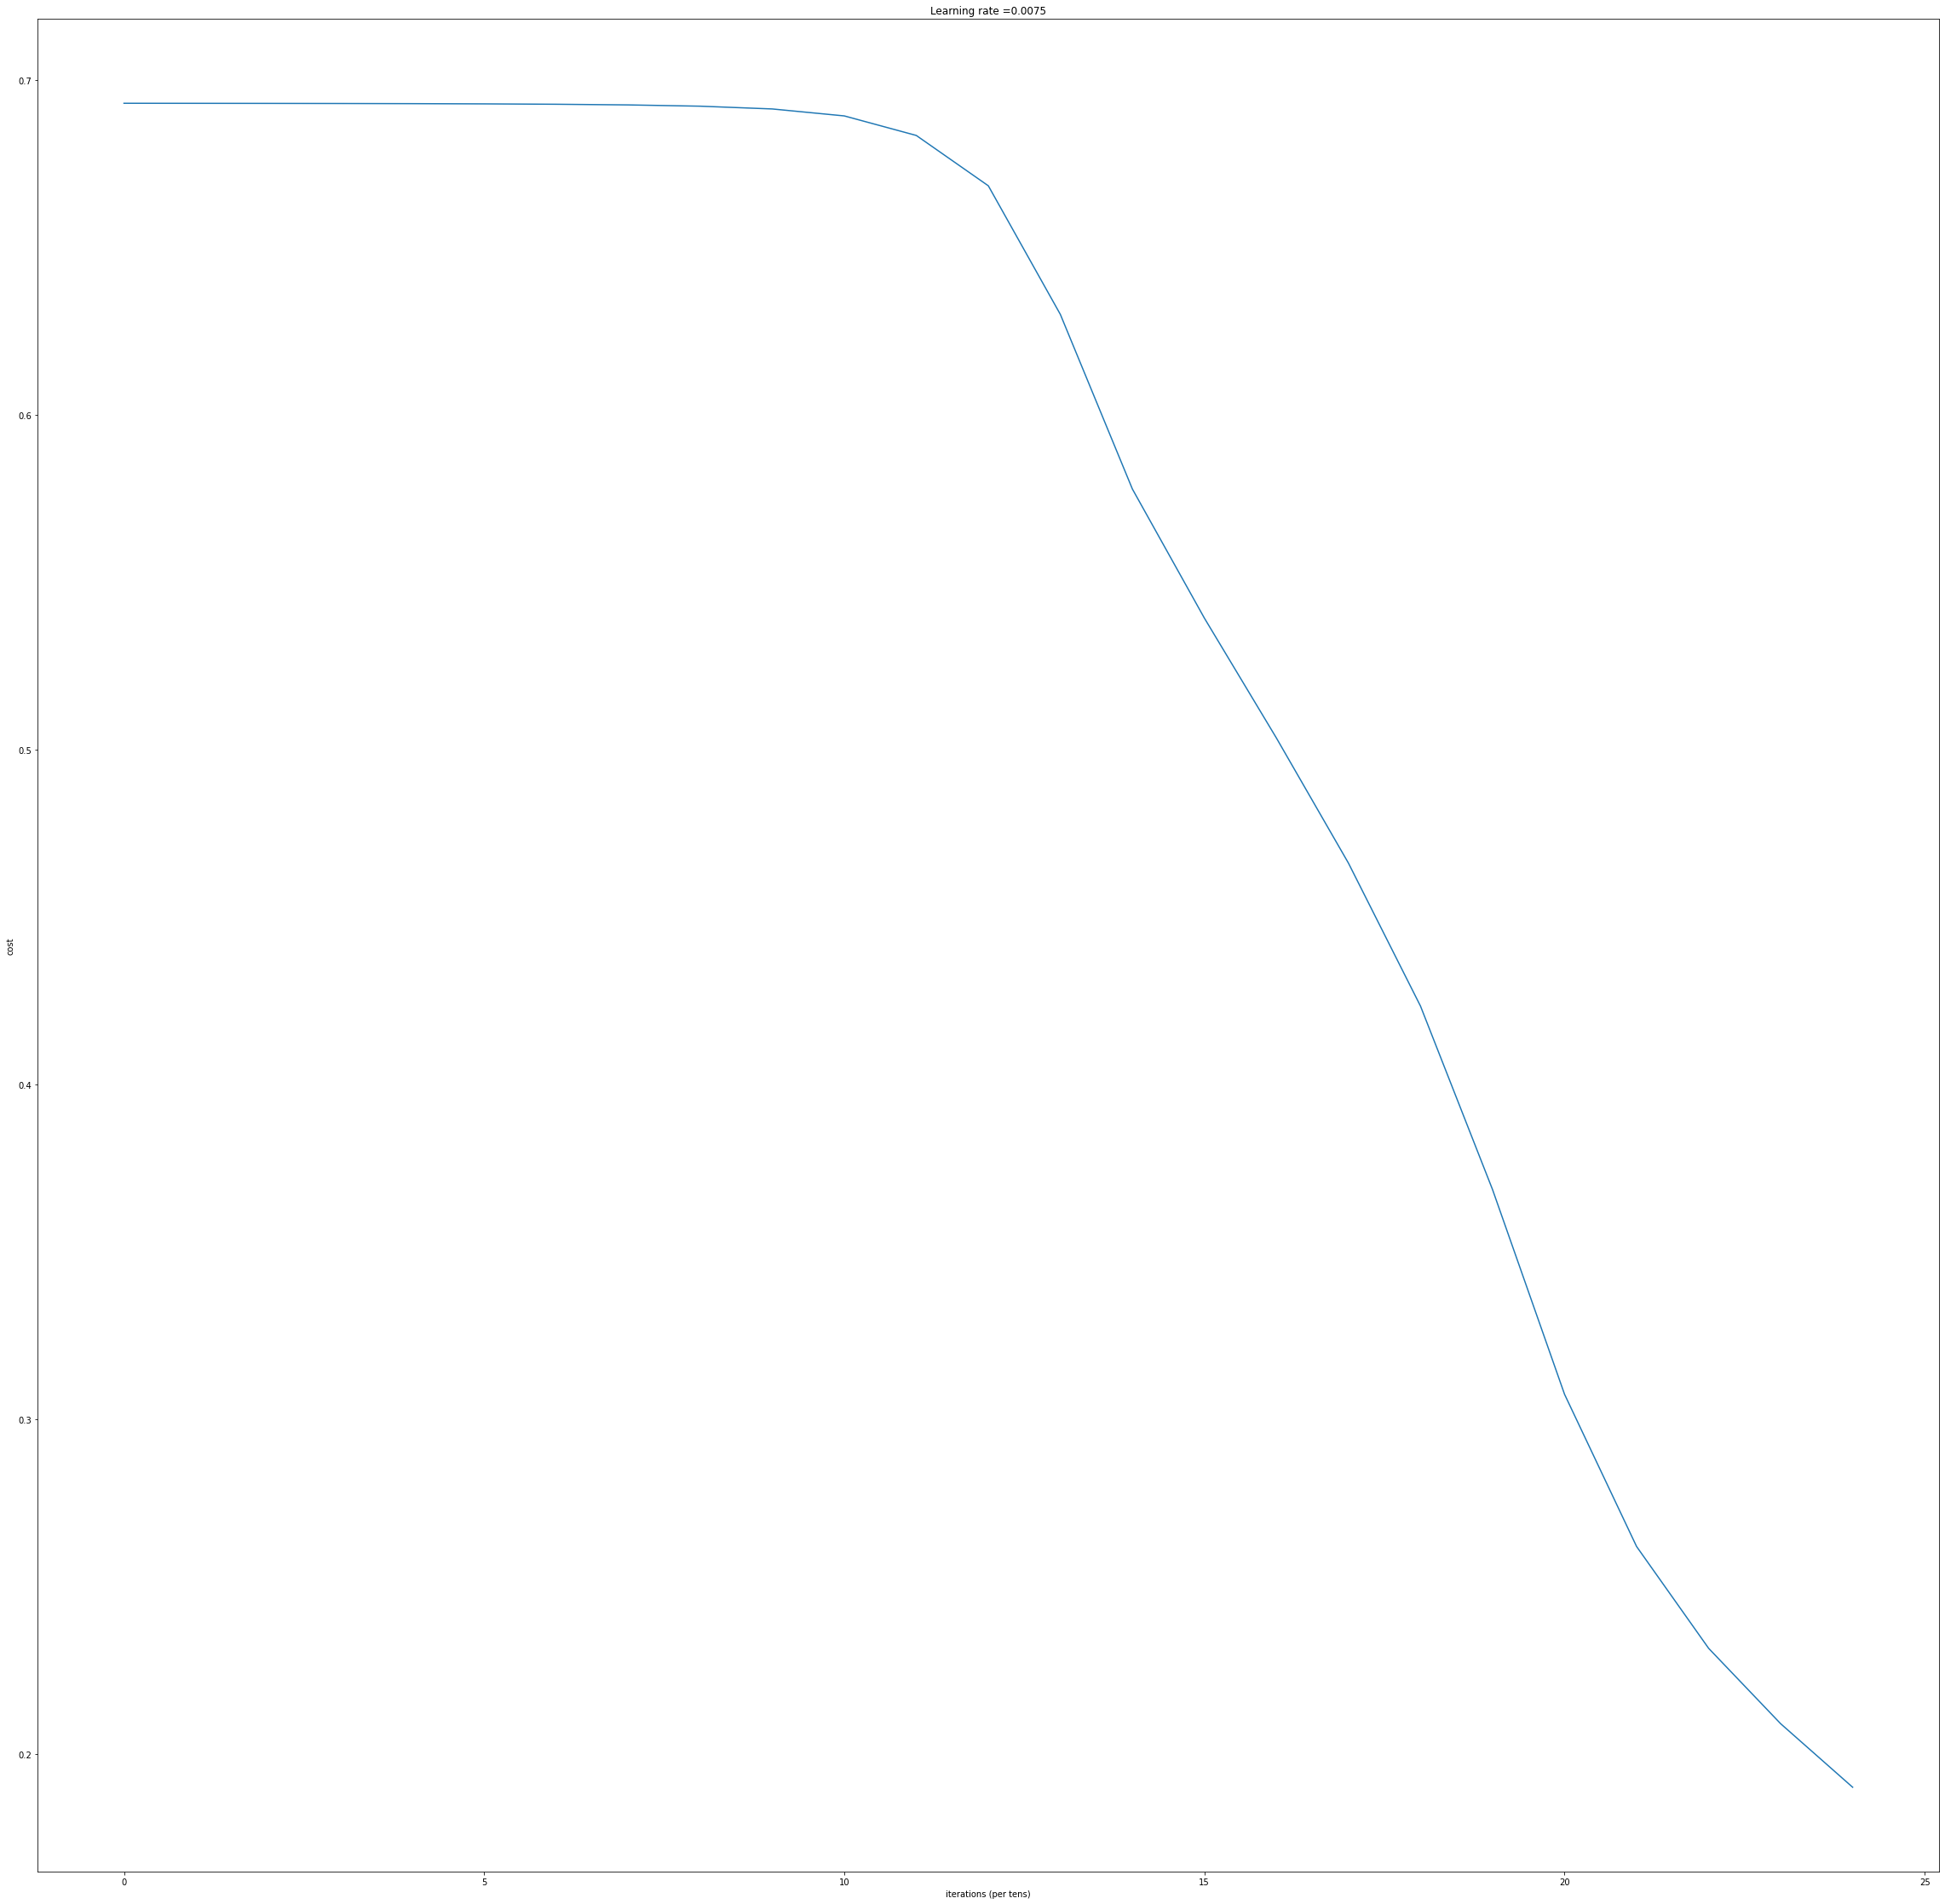

In [ ]:
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations = 2500, print_cost = True)

In [ ]:
pred_train = predict(train_set_x, train_set_y, parameters)

Accuracy: 0.9506578947368424


In [ ]:
pred_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 0.9166666666666665
